### Downloading the data from Kaggle using CLI

In [2]:
!kaggle datasets download jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
100%|██████████████████████████████████████| 1.99M/1.99M [00:02<00:00, 1.03MB/s]
100%|███████████████████████████████████████| 1.99M/1.99M [00:02<00:00, 945kB/s]


In [3]:
# Unzipping the dataset
!unzip "twitter-entity-sentiment-analysis.zip"

Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch

In [38]:
column_names = ['id', 'domain','label','text']

# Loading the data into the dataframes
train_df = pd.read_csv("twitter_training.csv",names=column_names)
valid_df = pd.read_csv("twitter_validation.csv",names=column_names)

train_df.drop(['id','domain'],axis=1,inplace=True)
valid_df.drop(['id','domain'],axis=1,inplace=True)

# Combining the complete dataset
df = pd.concat([train_df,valid_df],axis=0)

In [41]:
# Checking the overall size of the dataset
df.shape

(75682, 2)

In [42]:
# Checking the percentage of null values
df.isnull().mean()*100

label    0.000000
text     0.906424
dtype: float64

In [47]:
# Checking duplicate values
duplicate_values = df.duplicated().sum()
if duplicate_values > 0:
    df.drop_duplicates(inplace=True)
    print(f"{duplicate_values} duplicate values removed")
else:
    print("There are no duplicate values")

5426 duplicate values removed


In [49]:
df.isnull().mean()*100

label    0.000000
text     0.005693
dtype: float64

In [50]:
# Missing values reduced after removing the duplicate values so let us now remove null values
df.dropna(inplace=True)

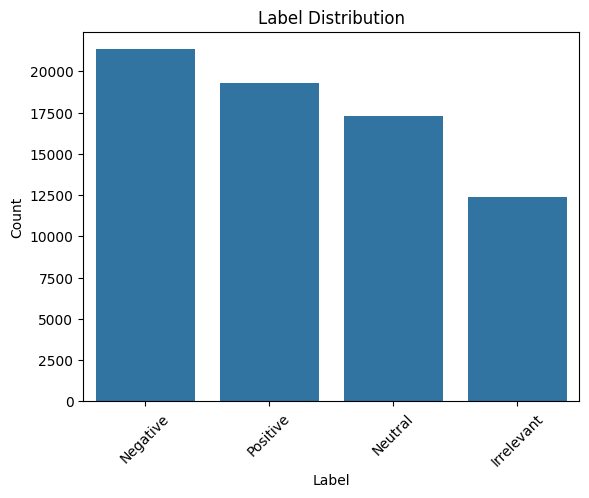

In [63]:
label_counts = df['label'].value_counts()

# Create a DataFrame for plotting (optional for Seaborn)
df_plot = pd.DataFrame({'label': label_counts.index, 'count': label_counts.values})

# Create the bar plot with Seaborn
sns.barplot(x="label", y="count", data=df_plot)  # Using df_plot (optional)

# Customize the plot (optional)
plt.title('Label Distribution')  # Set the title using sns.plt
plt.xlabel('Label')  # Set the x-axis label using sns.plt
plt.ylabel('Count')  # Set the y-axis label using sns.plt
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (optional)

# Show the plot
plt.show()

In [65]:
# Removing all the Irrelevant labels
df.drop(df[df.label == 'Irrelevant'].index,axis=0,inplace=True)
df = df.reset_index(drop=True)

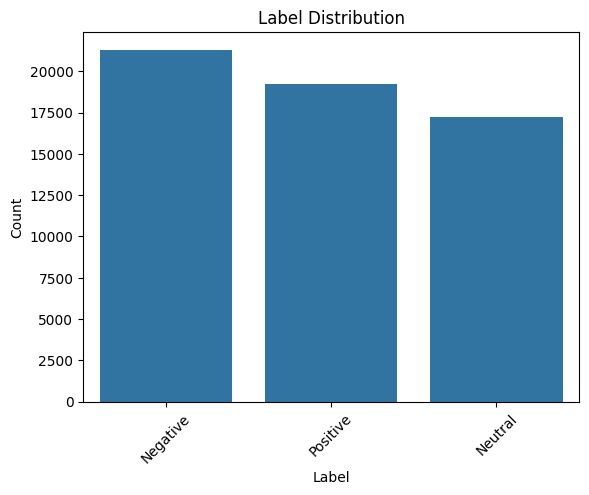

In [66]:
label_counts = df['label'].value_counts()

# Create a DataFrame for plotting (optional for Seaborn)
df_plot = pd.DataFrame({'label': label_counts.index, 'count': label_counts.values})

# Create the bar plot with Seaborn
sns.barplot(x="label", y="count", data=df_plot)  # Using df_plot (optional)

# Customize the plot (optional)
plt.title('Label Distribution')  # Set the title using sns.plt
plt.xlabel('Label')  # Set the x-axis label using sns.plt
plt.ylabel('Count')  # Set the y-axis label using sns.plt
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (optional)

# Show the plot
plt.show()

In [73]:
neutral_df = df[df['label'] == 'Neutral']
neg_df = df[df['label'] == 'Negative'].sample(neutral_df.shape[0])
pos_df = df[df['label'] == 'Positive'].sample(neutral_df.shape[0])

pos_df = pos_df.reset_index(drop=True)
neg_df = neg_df.reset_index(drop=True)
neutral_df = neutral_df.reset_index(drop=True)

df = pd.concat([pos_df,neg_df,neutral_df],axis=0)
df = df.reset_index(drop=True)

In [76]:
df['label'].value_counts()

label
Positive    17236
Negative    17236
Neutral     17236
Name: count, dtype: int64

In [77]:
# Saving the data
df.to_csv("Data.csv",index=False)

### Seperating the data into train,test and validation

In [85]:
training_test_data,valid_data = train_test_split(df,test_size=0.1)
train_data,test_data = train_test_split(training_test_data,train_size=0.8)

train_data.shape,valid_data.shape,test_data.shape

((37229, 2), (5171, 2), (9308, 2))

### Exploratory Data analysis

In [88]:
train_data

,label,text
45213,Neutral,Was t just doing at @HomeDepot & R while waiti...
11347,Positive,Guys its done! . .
4345,Positive,Trump would never name the source without addi...
42051,Neutral,I'd rather die than be carried on the head! - ...
35004,Neutral,Fox CEO Randy Pitchford Screws Tennis Score fo...
...,...,...
6355,Positive,Perfect Hearthstone BG run youtu.be/cntGVPcnab...
26406,Negative,2 RhandlerR RhandlerR how hard is it to make s...
27084,Negative,Is Verizon going to charge extra for 5G? ATT l...
19123,Negative,y’all as avoid spoiling trash bc it’ll stink e...
